# Aufgabe 3: MNIST-Evaluation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Aufgabe 3a

In [5]:
model = tf.keras.models.load_model("model.h5")

In [6]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0793 - accuracy: 0.9782


[0.07925237715244293, 0.9782000184059143]

For comparison results from model2 in the first script: [0.07697169482707977, 0.9786999821662903]

## Aufgabe 3b

Gesucht ist die model.predict Funktion

In [7]:
model.predict(x_test)

array([[4.22166169e-09, 4.51248013e-07, 1.43064080e-05, ...,
        9.99981165e-01, 2.05595647e-08, 1.29707996e-06],
       [1.10381286e-07, 1.91722011e-05, 9.99950409e-01, ...,
        1.28240236e-08, 1.32862024e-05, 1.74427320e-10],
       [3.31494360e-10, 9.99987960e-01, 1.80191449e-07, ...,
        9.37338427e-06, 1.66303721e-07, 9.38473832e-09],
       ...,
       [5.26340387e-15, 7.90576138e-09, 2.26295667e-13, ...,
        1.30174712e-07, 5.31321168e-11, 4.50555717e-08],
       [9.21231286e-11, 5.15192880e-12, 2.86068617e-11, ...,
        2.06425810e-08, 2.34040641e-07, 3.50056512e-10],
       [1.59129268e-14, 1.13693007e-12, 2.85443666e-14, ...,
        5.81737093e-16, 5.96690752e-10, 1.66833317e-16]], dtype=float32)

## Aufgabe 3c

First of all, it is helpful to put the predictions in label form, preferably via np.argmax:

In [8]:
predictions = np.argmax(model.predict(x_test), axis=-1)
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Accuracy ist dann die Zahl aller Einträge, die in predictions und y_test gleich (ungleich 0) sind, geteilt durch alle Einträge

In [10]:
accuracy = np.count_nonzero(predictions == y_test) / len(predictions)
accuracy

0.9782

Gleicher Wert wie durch model.evaluate

## Aufgabe 3d

Zur klassenweisen Berechnung ist es hilfreich, die one_hot_encoded Variante der Labels zu verwenden

In [11]:
pred_oh = tf.keras.utils.to_categorical(predictions)
y_test_oh = tf.keras.utils.to_categorical(y_test)

TP ist für alle Einträge = 1, die in pred_oh und y_test_oh gleich sind. <br>
FP ist, wenn pred_oh 1 vorhersagt, y_test_oh aber 0 zeigt. <br>
FN ist, wenn pred_oh 0 vorhersagt, y_test_oh aber 1 zeigt. <br>
Alles über Vektormultiplikation realisierbar, dazu noch summieren über die Batch-Achse.

In [12]:
tp = np.count_nonzero(pred_oh * y_test_oh, axis=0)
fp = np.count_nonzero(pred_oh * (1 - y_test_oh), axis=0)
fn = np.count_nonzero((1 - pred_oh) * y_test_oh, axis=0)
tn = np.count_nonzero((1 - pred_oh) * (1 - y_test_oh), axis=0)

Formeln wie aus der Vorlesung

In [13]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
precision, recall

(array([0.98477157, 0.99118943, 0.98151751, 0.96699029, 0.97280967,
        0.97961495, 0.98111228, 0.97579864, 0.95770393, 0.98965874]),
 array([0.98979592, 0.99118943, 0.97771318, 0.98613861, 0.98370672,
        0.96973094, 0.97599165, 0.98054475, 0.97638604, 0.94846383]))

In [14]:
f1 = 2 * precision * recall / (precision + recall)
f1

array([0.98727735, 0.99118943, 0.97961165, 0.97647059, 0.97822785,
       0.97464789, 0.97854526, 0.97816594, 0.96695475, 0.96862348])

## Aufgabe 3e

Durch unsere prediction-labels und y_test haben wir bereits Koordinaten für die Konfusionsmatrix. Zunächst erstellen wir eine Liste aus Tupeln, die unsere Koordinaten sind. y_test sind die Zeilen, predictions sind die Spalten

In [15]:
cm_entries = list(zip(y_test, predictions))

Jetzt müssen wir nur noch die Konfusionsmatrix erstellen und die Einträge ausfüllen

In [16]:
cm = np.zeros((10, 10), dtype=int)

In [17]:
for entry in cm_entries:
    cm[entry] += 1

In [18]:
cm

array([[ 970,    1,    0,    1,    0,    1,    4,    1,    2,    0],
       [   0, 1125,    2,    3,    0,    0,    1,    0,    4,    0],
       [   6,    0, 1009,    4,    2,    0,    3,    5,    3,    0],
       [   0,    0,    1,  996,    0,    4,    0,    4,    4,    1],
       [   1,    0,    1,    0,  966,    0,    5,    3,    2,    4],
       [   1,    0,    0,    9,    4,  865,    3,    0,    9,    1],
       [   3,    3,    1,    1,    5,    2,  935,    1,    7,    0],
       [   1,    3,    8,    1,    0,    0,    0, 1008,    4,    3],
       [   0,    0,    5,    5,    5,    3,    1,    3,  951,    1],
       [   3,    3,    1,   10,   11,    8,    1,    8,    7,  957]])

## Aufgabe 3f

Zunächst die Diagonalen auf 0 setzen

In [19]:
np.fill_diagonal(cm, 0)

Plotten mit Matplotlib

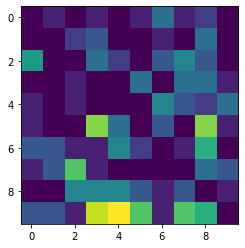

In [20]:
plt.imshow(cm)

Häufigste Verwechslungen (kann bei euch anders aussehen): <br>
2 wird als 3 erkannt <br>
2 wird als 8 erkannt <br>
4 wird als 9 erkannt <br>
5 wird als 6 erkannt

## Aufgabe 3g

Gesucht sind die beiden Funktionen "confusion_matrix" und "classification_report"

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusion_matrix(y_test, predictions)

array([[ 970,    1,    0,    1,    0,    1,    4,    1,    2,    0],
       [   0, 1125,    2,    3,    0,    0,    1,    0,    4,    0],
       [   6,    0, 1009,    4,    2,    0,    3,    5,    3,    0],
       [   0,    0,    1,  996,    0,    4,    0,    4,    4,    1],
       [   1,    0,    1,    0,  966,    0,    5,    3,    2,    4],
       [   1,    0,    0,    9,    4,  865,    3,    0,    9,    1],
       [   3,    3,    1,    1,    5,    2,  935,    1,    7,    0],
       [   1,    3,    8,    1,    0,    0,    0, 1008,    4,    3],
       [   0,    0,    5,    5,    5,    3,    1,    3,  951,    1],
       [   3,    3,    1,   10,   11,    8,    1,    8,    7,  957]])

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

